In [1]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
#load packages 

In [2]:
# Function to convert Json file to pandas dataframe 
def makeDF():
    data = []
    with open('renttherunway_final_data.json') as json_file:
        for line in json_file:
            data.append(json.loads(line))
    #create data frame from array of dicts and drop duplicated rows
    rr_df = pd.DataFrame.from_records(data).drop_duplicates().reset_index() 
    rr_df.rename(columns={
        'body type':'body_type',
        'rented for':'rented_for',
        'bust size':'bra_size'
    },inplace=True)
    return(rr_df)

runway_df = makeDF()

In [3]:
runway_df.category.unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

In [4]:
#Function to recode duplicate categories with extra s 
def recode_categories(df):
    df = df.replace({'category': 'skirts'}, 'skirt')
    df = df.replace({'category': 'trousers'}, 'trouser')
    df = df.replace({'category': 'pant'}, 'pants')
    df = df.replace({'category': 'leggings'}, 'legging')
    df = df.replace({'category': 'culottes'}, 'culotte')
    return (df)
runway_df = recode_categories(runway_df)
runway_df.category.unique()

array(['romper', 'gown', 'sheath', 'dress', 'legging', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culotte', 'down',
       'trouser', 'midi', 'print', 'knit', 'sweatshirt', 'peacoat',
       'kaftan', 'overalls', 'jogger', 'tee', 'combo', 'henley', 'cami',
       'blouson', 'turtleneck', 'overcoat', 'hoodie', 't-shirt', 'caftan',
       'tight', 'kimono', 'for', 'crewneck', 'parka', 'buttondown',
       'skort', 'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

In [5]:
#Function to seperate brasize from cupsize 
def convert_brasize(df):
    df['cup_size'] = df['bra_size']
    bust = df['bra_size']
    cup = []
    bra = []
    for i in range(len(bust)):
        if isinstance(bust[i], float) or bust[i] == 'NaN' or bust[i] == 'nan':
            cup.append(float('NaN'))
            bra.append(float('NaN'))
            continue
        bra.append(bust[i][:2])
        cup.append(bust[i][2:])
    df['cup_size'] = cup
    df['bra_size'] = bra
    df['bra_size'] = [float(j) for j in df['bra_size']]
    return(df)
runway_df = convert_brasize(runway_df)

In [6]:
#Convert height to centimeters
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[3])*2.54)
    except:
        return (int(x[0])*30.48)
runway_df.height = runway_df.height.apply(get_cms)

In [7]:
def get_weight_nums(df):
    weight = df['weight'] 
    new_weight = []
    for i in range(len(weight)):
        if isinstance(weight[i],float) or weight[i] == 'NaN' or weight[i] == 'nan':
            new_weight.append(float('NaN'))
            continue
        new_weight.append(weight[i][:-3])
    df['weight'] = new_weight
    return(df)
runway_df = get_weight_nums(runway_df)

In [8]:
runway_df.head() # checking the reformatting is working 

,index,age,body_type,bra_size,category,fit,height,item_id,rating,rented_for,review_date,review_summary,review_text,size,user_id,weight,cup_size
0,0,28,hourglass,34.0,romper,fit,172.72,2260466,10,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137,d
1,1,36,straight & narrow,34.0,gown,fit,167.64,153475,10,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132,b
2,2,116,NaN,NaN,sheath,fit,162.56,1063761,10,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN,NaN
3,3,34,pear,34.0,dress,fit,165.10,126335,8,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135,c
4,4,27,athletic,34.0,gown,fit,175.26,616682,10,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145,b


In [9]:
runway_df.drop(['index'], axis=1, inplace=True)
runway_df.head()

,age,body_type,bra_size,category,fit,height,item_id,rating,rented_for,review_date,review_summary,review_text,size,user_id,weight,cup_size
0,28,hourglass,34.0,romper,fit,172.72,2260466,10,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137,d
1,36,straight & narrow,34.0,gown,fit,167.64,153475,10,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132,b
2,116,NaN,NaN,sheath,fit,162.56,1063761,10,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN,NaN
3,34,pear,34.0,dress,fit,165.10,126335,8,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135,c
4,27,athletic,34.0,gown,fit,175.26,616682,10,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145,b


In [10]:
runway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192355 entries, 0 to 192354
Data columns (total 16 columns):
age               191395 non-null object
body_type         177730 non-null object
bra_size          173963 non-null float64
category          192355 non-null object
fit               192355 non-null object
height            191680 non-null float64
item_id           192355 non-null object
rating            192274 non-null object
rented_for        192345 non-null object
review_date       192355 non-null object
review_summary    192355 non-null object
review_text       192355 non-null object
size              192355 non-null int64
user_id           192355 non-null object
weight            162400 non-null object
cup_size          173963 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 23.5+ MB


In [219]:
runway_df.to_csv('renttherunway_data.csv', index=False)

In [220]:
from rpy2.robjects.vectors import StrVector
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects

def clean_data_duplicates(data):
    base = rpackages.importr('base')
    packageNames = ('tidyverse')
    tidyverse = rpackages.importr('tidyverse')
    robjects.r['options'](warn=-1)
    create_file = robjects.r('''
        function(results_file) {
            runway_df <- read_csv(results_file, col_names = T)
            remove_rows <- runway_df %>% group_by(item_id, user_id) %>% count() %>% arrange(desc(n)) %>% filter(n >=2)
            remove_data <- runway_df %>% filter(item_id %in% remove_rows$item_id & user_id %in% remove_rows$user_id)
            runway_stat  <- runway_df %>% anti_join(., remove_data) %>% distinct()
            write_csv(runway_stat, "renttherunway_final_data.csv", col_names = T)

        }
        ''')

    create_file(data)

In [221]:
clean_data_duplicates("renttherunway_data.csv") # make count data

//anaconda/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Parsed with column specification:
cols(
  age = col_integer(),
  body_type = col_character(),
  bra_size = col_double(),
  category = col_character(),
  fit = col_character(),
  height = col_double(),
  item_id = col_integer(),
  rating = col_integer(),
  rented_for = col_character(),
  review_date = col_character(),
  review_summary = col_character(),
  review_text = col_character(),
  size = col_integer(),
  user_id = col_integer(),
  weight = col_integer(),
  cup_size = col_character()
)

  warnings.warn(x, RRuntimeWarning)



|
                                                          
|
   9%    7 MB

|
                                                          
|
   9%    7 MB

|
                                                          
|
  10%    7 MB

|
                                                          
|
  10%    8 MB

|
                                                          
|
  10%    8 MB

|
                                                         
|
  10%    8 MB

|
                                                         
|
  11%    8 MB

|
                                                         
|
  11%    9 MB

|
                                                         
|
  11%    9 MB

|
                                                        
|
  12%    9 MB

|
                                                        
|
  12%   10 MB

|
                                                        
|
  12%   10 MB

|
                                                        
|
  13%   10 M

//anaconda/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Joining, by = c("age", "body_type", "bra_size", "category", "fit", "height", "item_id", "rating", "rented_for", "review_date", "review_summary", "review_text", "size", "user_id", "weight", "cup_size")

  warnings.warn(x, RRuntimeWarning)


In [11]:
rr_final = pd.read_csv('renttherunway_final_data.csv') # load de-replicated data 
rr_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192193 entries, 0 to 192192
Data columns (total 16 columns):
age               191235 non-null float64
body_type         177583 non-null object
bra_size          173820 non-null float64
category          192193 non-null object
fit               192193 non-null object
height            191518 non-null float64
item_id           192193 non-null int64
rating            192113 non-null float64
rented_for        192183 non-null object
review_date       192193 non-null object
review_summary    191835 non-null object
review_text       192131 non-null object
size              192193 non-null int64
user_id           192193 non-null int64
weight            162269 non-null float64
cup_size          173820 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 23.5+ MB


In [12]:
missing_data = pd.DataFrame({'total_missing': rr_final.isnull().sum(), 'perc_missing': (rr_final.isnull().sum()/192193)*100})
missing_data

,perc_missing,total_missing
age,0.498457,958
body_type,7.601734,14610
bra_size,9.559661,18373
category,0.000000,0
fit,0.000000,0
height,0.351209,675
item_id,0.000000,0
rating,0.041625,80
rented_for,0.005203,10
review_date,0.000000,0


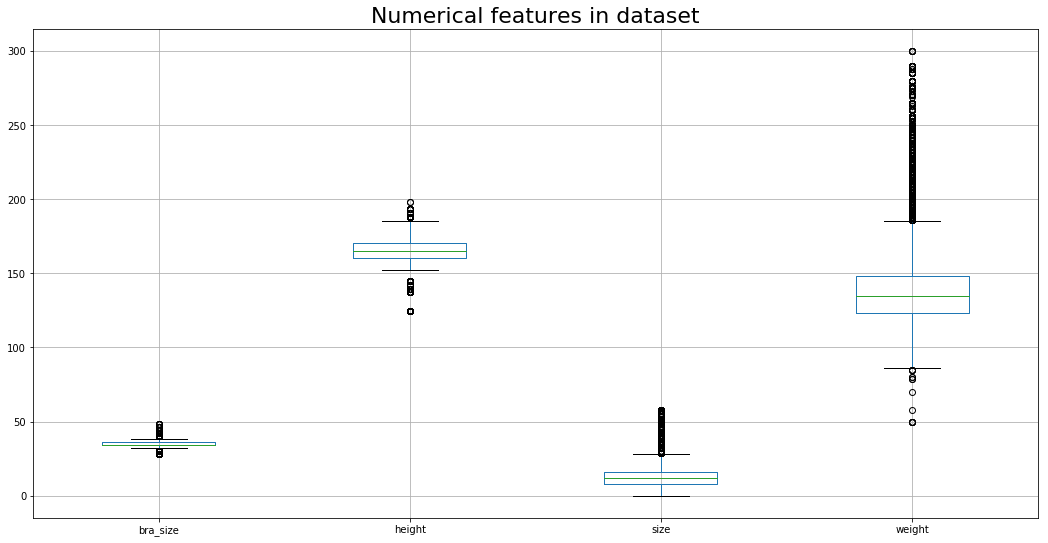

In [13]:
#Plotting for outliers in numerical variables 
boxplot_cols = ['bra_size','height','size', 'weight']
plt.figure(figsize=(18,9))
rr_final[boxplot_cols].boxplot()
plt.title("Numerical features in dataset", fontsize=22)
plt.show()

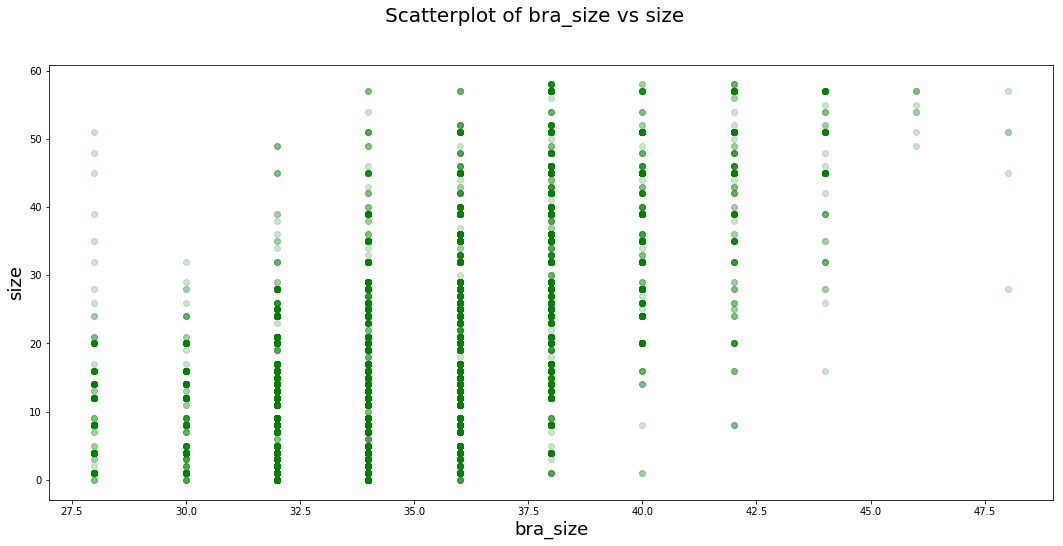

In [14]:
# Plotting scatterplot of bra size and size 
plt.figure(figsize=(18,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Scatterplot of bra_size vs size", fontsize= 20)
plt.plot(rr_final.bra_size, rr_final['size'], 'go', alpha=0.2)
plt.show()

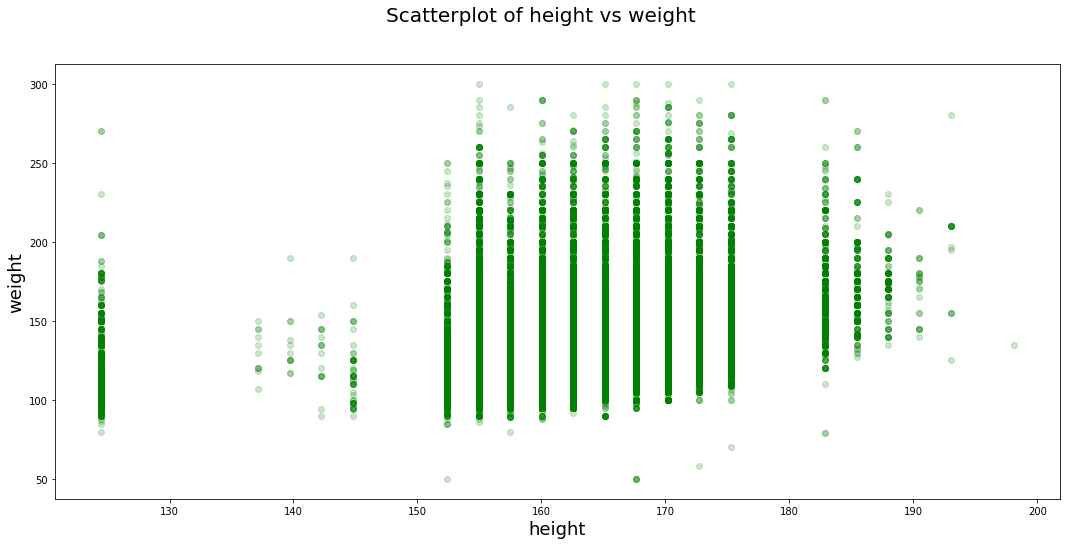

In [15]:
# Plotting scatterplot of height and weight 
plt.figure(figsize=(18,8))
plt.xlabel("height", fontsize=18)
plt.ylabel("weight", fontsize=18)
plt.suptitle("Scatterplot of height vs weight", fontsize= 20)
plt.plot(rr_final.height, rr_final['weight'], 'go', alpha=0.2)
plt.show()

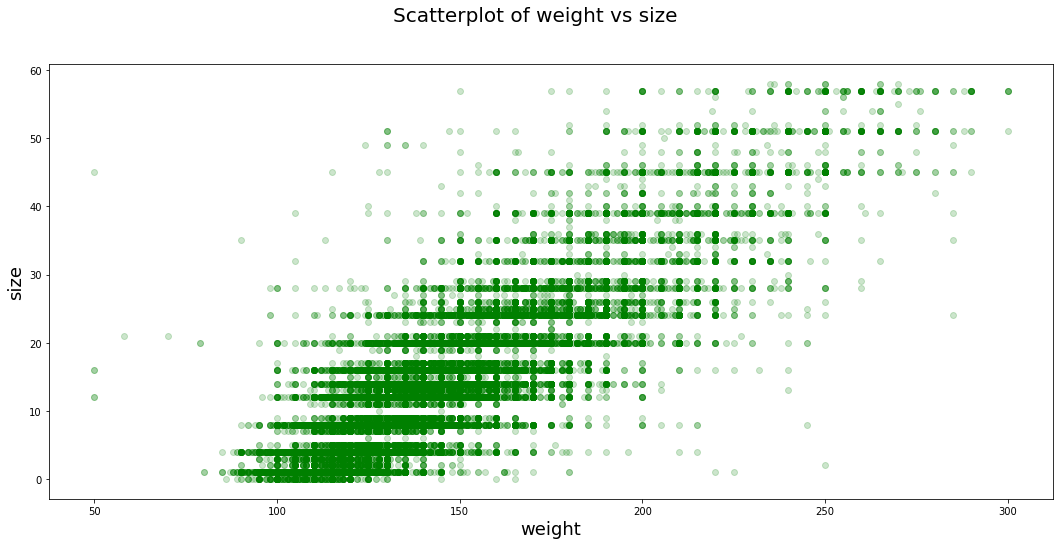

In [16]:
# Plotting scatterplot of weight and size 
plt.figure(figsize=(18,8))
plt.xlabel("weight", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Scatterplot of weight vs size", fontsize= 20)
plt.plot(rr_final.weight, rr_final['size'], 'go', alpha=0.2)
plt.show()

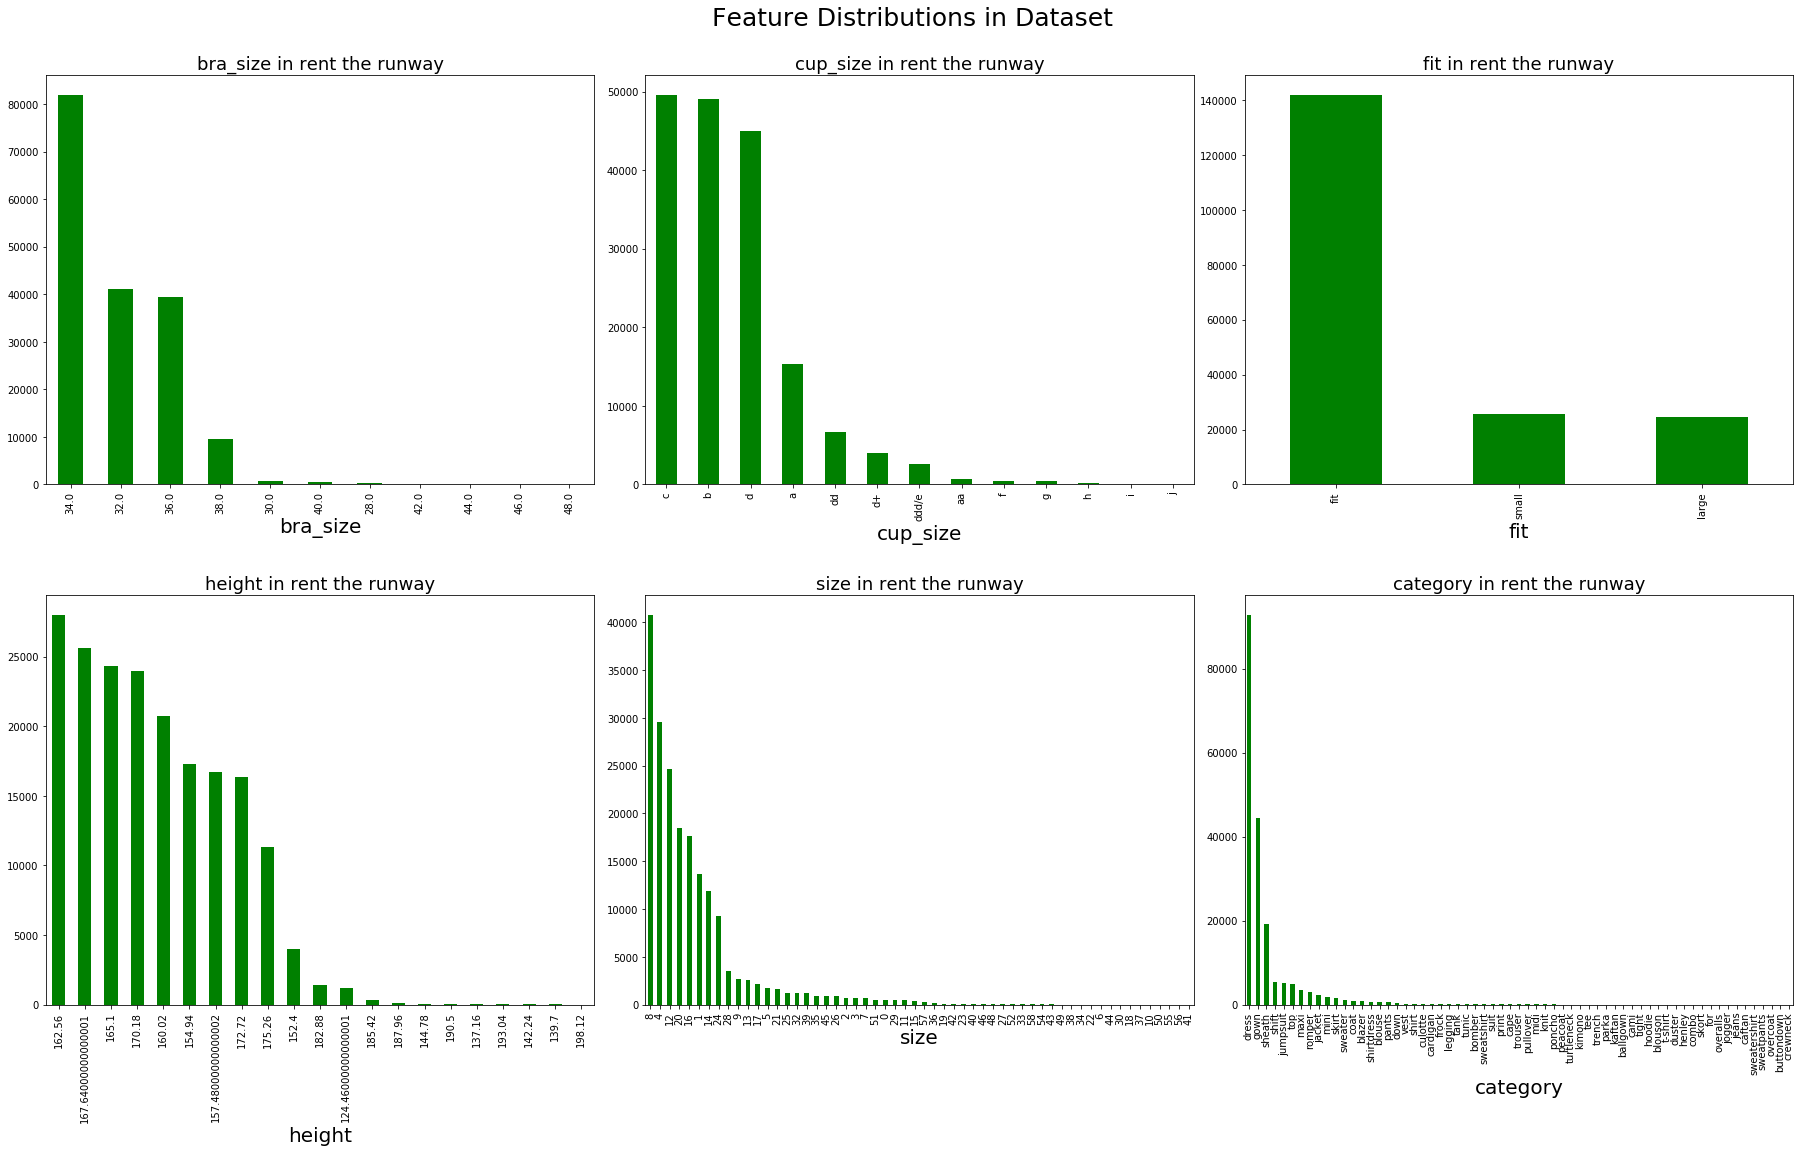

In [17]:
def plot_dist(col, ax):
    runway_df[col][runway_df[col].notnull()].value_counts().plot('bar', facecolor='g', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} in rent the runway".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(2,3, figsize = (25,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra_size', 'cup_size', 'fit', 'height', 'size','category']
k = 0
for i in range(2):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Feature Distributions in Dataset", fontsize= 25)

plt.show()

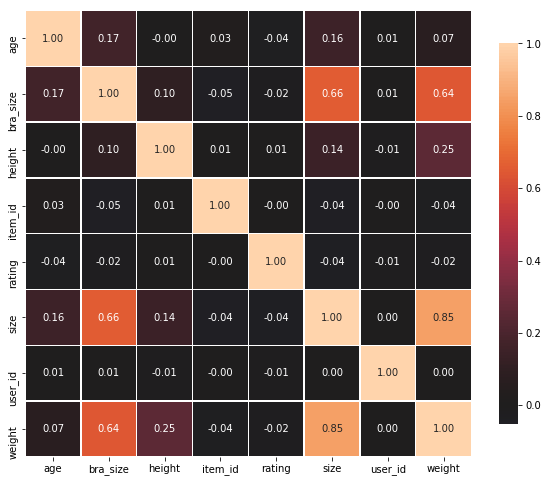

In [18]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(rr_final)

In [150]:
rr_final.columns

Index(['age', 'body_type', 'bra_size', 'category', 'fit', 'height', 'item_id',
       'rating', 'rented_for', 'review_date', 'review_summary', 'review_text',
       'size', 'user_id', 'weight', 'cup_size'],
      dtype='object')

In [26]:
# Determine feature importance for randome forest 
rf_rr_model = rr_final.drop(['review_text', 'review_summary', 'review_date', 'rented_for', 'user_id', 'rating'], axis=1)
rf_rr_model = rf_rr_model.fillna('unknown')

# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
rf_rr_model = rf_rr_model.astype(str)
rf_encoded = rf_rr_model.apply(le.fit_transform)
rf_encoded.head()

,age,body_type,bra_size,category,fit,height,item_id,size,weight,cup_size
0,25,3,3,41,0,13,2802,6,37,4
1,34,6,3,19,0,11,1195,4,32,2
2,8,7,11,42,0,9,144,33,190,13
3,32,4,3,15,0,10,562,54,35,3
4,24,1,3,19,0,14,5081,4,45,2


In [28]:
y = rf_encoded.fit 
X = rf_encoded.drop(['fit'], axis=1)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =y, random_state=66)

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))

=== Confusion Matrix ===
[[26714   766   881]
 [ 4464   345   123]
 [ 4652    89   405]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.75      0.94      0.83     28361
          1       0.29      0.07      0.11      4932
          2       0.29      0.08      0.12      5146

avg / total       0.63      0.71      0.65     38439



[0.17407592 0.07738621 0.04479262 0.04784299 0.12324016 0.28262697
 0.05683467 0.1121665  0.08103396]


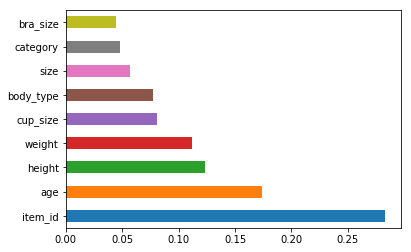

In [29]:
print(rfc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
rr_model_df= rr_final
#drop features
rr_model_df = rr_model_df.drop(['bra_size', 'category', 'rating', 'rented_for', 'review_date', 'review_summary','review_text', 'user_id'], axis=1)
rr_model_df = rr_model_df.fillna('unknown')

In [31]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
rr_model_df = rr_model_df.astype(str)
rr_encoded = rr_model_df.apply(le.fit_transform)
# print(rr_encoded)
rr_encoded.head()

,age,body_type,fit,height,item_id,size,weight,cup_size
0,25,3,0,13,2802,6,37,4
1,34,6,0,11,1195,4,32,2
2,8,7,0,9,144,33,190,13
3,32,4,0,10,562,54,35,3
4,24,1,0,14,5081,4,45,2


In [33]:
# importing necessary libraries 
from sklearn.neighbors import KNeighborsClassifier 
# X -> features, y -> label 
# X = rr_encoded[['body_type', 'category', 'height', 'size', 'item_id'] ]
X = rr_encoded[['age', 'body_type', 'height', 'size', 'item_id'] ]
y = rr_encoded.fit 

0.6928119878248654


In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#model with cv of 10 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.69469303 0.69453694 0.69573361 0.69406868 0.69301212 0.68926583
 0.69826734 0.69093085 0.6949373  0.69257987]
cv_scores mean:0.693802557612857


In [40]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 24}

In [43]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7383723652786522